In [2]:
## forecasting trail traffic using prophet, no carrying capacity change
## trail data: Hamden

In [3]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import datetime
from datetime import date
from datetime import datetime
%matplotlib inline

In C:\Users\myin9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\myin9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\myin9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\myin9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\myin9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [4]:
# read data
df = pd.read_csv('trail.csv')
df.head()

,Date,Cheshire,Hamden,New Haven
0,11/19/2016,NaN,NaN,239.0
1,11/20/2016,NaN,NaN,108.0
2,11/21/2016,NaN,NaN,163.0
3,11/22/2016,NaN,NaN,183.0
4,11/23/2016,NaN,NaN,185.0


In [5]:
# replace column names
df=df.rename(columns={'Day':'date', 'Cheshire':'cheshire','Hamden':'hamden','New Haven':'newhaven'})
print(df.head())

         Date cheshire  hamden  newhaven
0  11/19/2016      NaN     NaN     239.0
1  11/20/2016      NaN     NaN     108.0
2  11/21/2016      NaN     NaN     163.0
3  11/22/2016      NaN     NaN     183.0
4  11/23/2016      NaN     NaN     185.0


In [6]:
df['Date']=pd.to_datetime(df['Date'])
print(df.head())

        Date cheshire  hamden  newhaven
0 2016-11-19      NaN     NaN     239.0
1 2016-11-20      NaN     NaN     108.0
2 2016-11-21      NaN     NaN     163.0
3 2016-11-22      NaN     NaN     183.0
4 2016-11-23      NaN     NaN     185.0


In [7]:
# imputation
df['cheshire'].fillna(0,inplace=True)
df['hamden'].fillna(0,inplace=True)
df['newhaven'].fillna(0,inplace=True)
print(df.head(5))

        Date cheshire  hamden  newhaven
0 2016-11-19        0     0.0     239.0
1 2016-11-20        0     0.0     108.0
2 2016-11-21        0     0.0     163.0
3 2016-11-22        0     0.0     183.0
4 2016-11-23        0     0.0     185.0


In [8]:
# start with analyzing cheshire
        
df.rename(columns={'Date': 'ds','hamden': 'y'}, inplace=True)
        
# check data type and convert object to float
df.dtypes  # cheshire's type is object and cannot convert to float
#df['y_float']=df['y'].astype(float)

ds          datetime64[ns]
cheshire            object
y                  float64
newhaven           float64
dtype: object

In [9]:
df.drop(columns=['cheshire','newhaven'])

,ds,y
0,2016-11-19,0.0
1,2016-11-20,0.0
2,2016-11-21,0.0
3,2016-11-22,0.0
4,2016-11-23,0.0
...,...,...
1076,2019-10-31,50.0
1077,2019-11-01,155.0
1078,2019-11-02,355.0
1079,2019-11-03,419.0


In [10]:
# drop days before sensor installation in Hamden: before 2017-6-21, 215 rows
df =df[216:]

In [11]:
model=Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
#create future dates
future_hamden=model.make_future_dataframe(periods=365)

#predict trail traffic
forecast=model.predict(future_hamden)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1225,2020-10-30,46.348720,-120.526207,238.464928
1226,2020-10-31,207.114385,22.007317,372.553388
1227,2020-11-01,192.856541,0.915460,377.503734
1228,2020-11-02,36.042011,-151.919227,216.186380
1229,2020-11-03,30.184647,-141.670058,213.053615


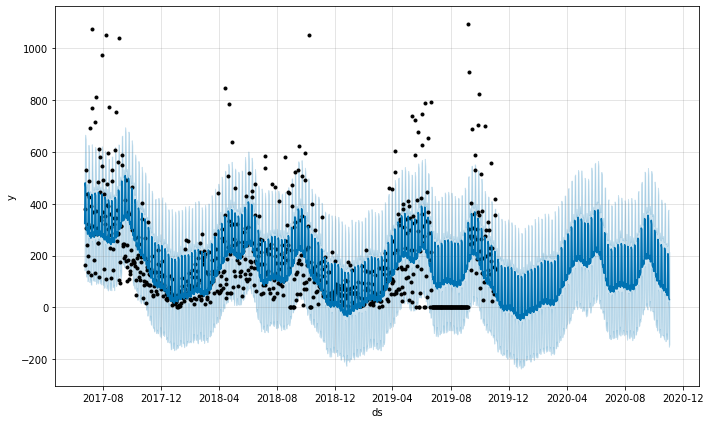

In [13]:
# display forecast results
model.plot(forecast)
plt.show()


In [14]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1225,2020-10-30,115.877231,-120.526207,238.464928,81.696288,153.265269,-69.528511,-69.528511,-69.528511,-47.665492,-47.665492,-47.665492,-21.863019,-21.863019,-21.863019,0.0,0.0,0.0,46.348720
1226,2020-10-31,115.837977,22.007317,372.553388,81.466801,153.347145,91.276409,91.276409,91.276409,116.909334,116.909334,116.909334,-25.632925,-25.632925,-25.632925,0.0,0.0,0.0,207.114385
1227,2020-11-01,115.798722,0.915460,377.503734,81.240357,153.461781,77.057818,77.057818,77.057818,106.680037,106.680037,106.680037,-29.622219,-29.622219,-29.622219,0.0,0.0,0.0,192.856541
1228,2020-11-02,115.759468,-151.919227,216.186380,81.043655,153.620434,-79.717457,-79.717457,-79.717457,-45.915706,-45.915706,-45.915706,-33.801751,-33.801751,-33.801751,0.0,0.0,0.0,36.042011
1229,2020-11-03,115.720214,-141.670058,213.053615,80.957403,153.778118,-85.535567,-85.535567,-85.535567,-47.400247,-47.400247,-47.400247,-38.135320,-38.135320,-38.135320,0.0,0.0,0.0,30.184647


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


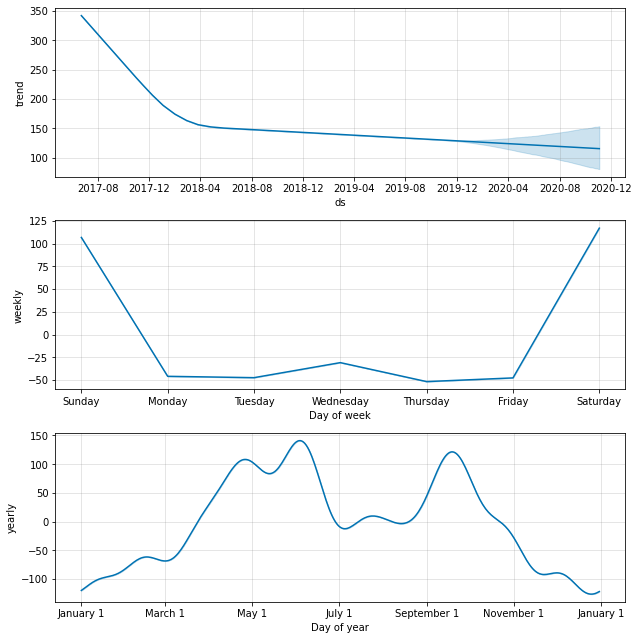

In [15]:
# trends, display
model.plot_components(forecast)
print(forecast.columns)

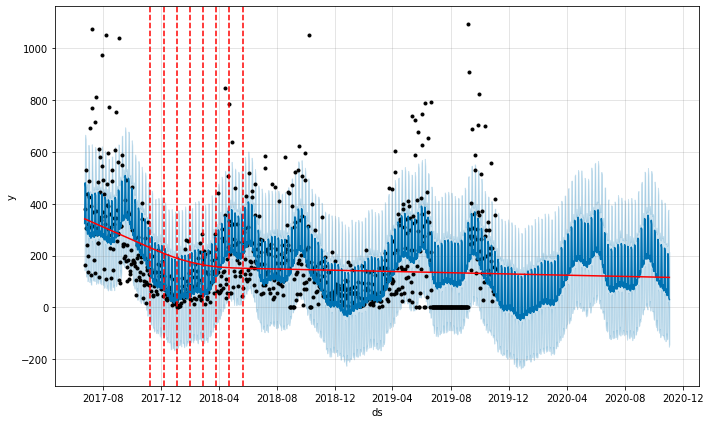

In [16]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
#plt.gca(): find axes's ax
ax = add_changepoints_to_plot(fig.gca(),model,forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


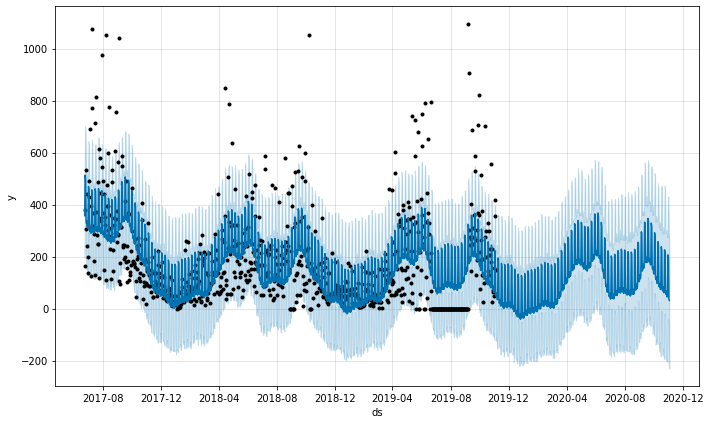

In [18]:
# locate change points 
model = Prophet(changepoints=['2017-12-01'])
model.fit(df)
future= model.make_future_dataframe(periods=365)
forecast =model.predict(future)
model.plot(forecast);

In [19]:
# dataframe for annual us public holids+2020 covid-19 ""Stay Safe, Stay Home" restrictions " since 2020-03-20


In [20]:
#dataframe of annual specific holidays that affect trail usage+ US Public Holidays over training and forecasting periods 
# define specific "holidays": still call them holidays even they actrually are extreme weathers
tornadoes = pd.DataFrame({
  'holiday': 'tornadoes',
  'ds': pd.to_datetime(['2018-05-15', '2018-07-17', '2018-08-04',
                        '2018-10-02', '2018-10-29', '2019-09-04',
                        '2020-08-02', '2020-08-04', '2020-08-27']),
                        
  'lower_window': 0,
  'upper_window': 2,
})

# heavy snow days, include heavy winter rain days
snows = pd.DataFrame({
  'holiday': 'snows',
  'ds': pd.to_datetime(['2017-12-09','2018-03-13','2018-12-21',
                        '2019-01-21','2019-01-24', '2019-03-03', '2019-12-03']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((tornadoes, snows))

# add build-in us holidays
model = Prophet(interval_width=0.95,holidays=holidays)
model.add_country_holidays(country_name='US')
model.fit(df)

model.train_holiday_names




INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0                      tornadoes
1                          snows
2                 New Year's Day
3      New Year's Day (Observed)
4     Martin Luther King Jr. Day
5          Washington's Birthday
6                   Memorial Day
7               Independence Day
8                      Labor Day
9                   Columbus Day
10                  Veterans Day
11       Veterans Day (Observed)
12                  Thanksgiving
13                 Christmas Day
dtype: object

In [21]:
future=model.make_future_dataframe(periods=365)
forecast =model.predict(future)
print(forecast)

             ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2017-06-23  340.634631   52.441360  576.045389   340.634631   340.634631   
1    2017-06-24  339.779756  208.764644  738.668384   339.779756   339.779756   
2    2017-06-25  338.924881  193.613132  723.232246   338.924881   338.924881   
3    2017-06-26  338.070006   32.142864  565.291314   338.070006   338.070006   
4    2017-06-27  337.215131   43.086268  557.873647   337.215131   337.215131   
...         ...         ...         ...         ...          ...          ...   
1225 2020-10-30  106.295762 -231.612183  315.783816    46.764110   173.432297   
1226 2020-10-31  106.239752  -57.849265  486.435581    46.486852   173.679824   
1227 2020-11-01  106.183741 -108.366498  458.152421    46.209595   173.926789   
1228 2020-11-02  106.127730 -220.567843  297.808705    45.934416   174.173755   
1229 2020-11-03  106.071720 -246.597173  333.893498    45.660003   174.420721   

      Christmas Day  Christ

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas Day', 'Christmas Day_lower', 'Christmas Day_upper',
       'Columbus Day', 'Columbus Day_lower', 'Columbus Day_upper',
       'Independence Day', 'Independence Day_lower', 'Independence Day_upper',
       'Labor Day', 'Labor Day_lower', 'Labor Day_upper',
       'Martin Luther King Jr. Day', 'Martin Luther King Jr. Day_lower',
       'Martin Luther King Jr. Day_upper', 'Memorial Day',
       'Memorial Day_lower', 'Memorial Day_upper', 'New Year's Day',
       'New Year's Day_lower', 'New Year's Day_upper',
       'New Year's Day (Observed)', 'New Year's Day (Observed)_lower',
       'New Year's Day (Observed)_upper', 'Thanksgiving', 'Thanksgiving_lower',
       'Thanksgiving_upper', 'Veterans Day', 'Veterans Day_lower',
       'Veterans Day_upper', 'Veterans Day (Observed)',
       'Veterans Day (Observed)_lower', 'Veterans Day (Observed)_upper',
       'Washington's Birthday', 'Washington

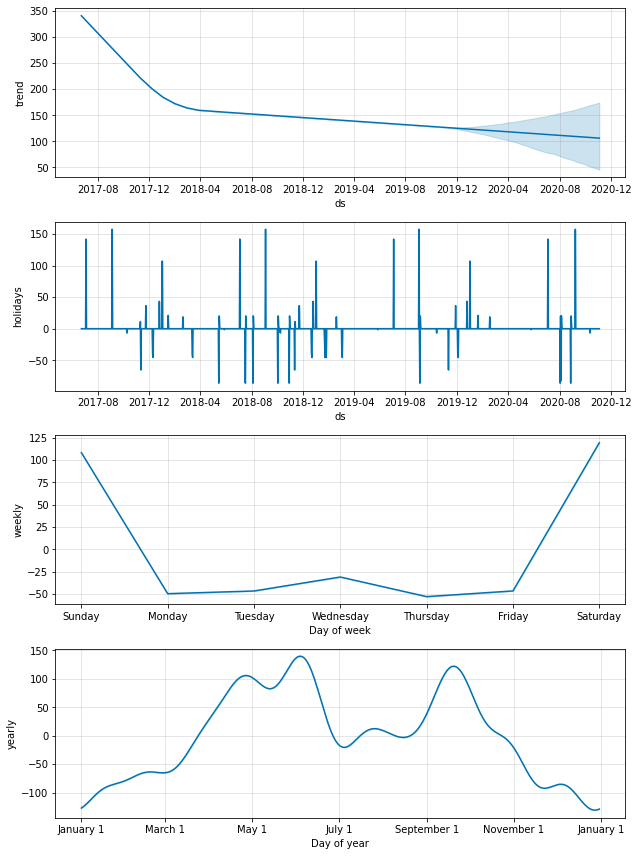

In [22]:
# show the impacts of "holidays"
forecast[(forecast['tornadoes']+forecast['snows']).abs()>0][['ds', 'tornadoes', 'snows']][-10:]

#print(forecast)

# 可以使用 plot_forecast_component（从fbprophet.plot导入）来画出独立的节假日的成分

from fbprophet.plot import plot_forecast_component
model.plot_components(forecast);
print(forecast.columns)

In [23]:
#如果发现节假日效应被过度拟合了，通过设置参数 holidays_prior_scale 可以调整它们的先验规模来使之平滑，默认下该值取 10 。
m = Prophet(holidays=holidays, holidays_prior_scale=0.100).fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[(forecast['tornadoes'] + forecast['snows']).abs() > 0][['ds', 'tornadoes', 'snows']][-10:]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,tornadoes,snows
893,2019-12-03,0.000000,-27.999801
894,2019-12-04,0.000000,-34.498592
1136,2020-08-02,-66.023498,0.000000
1137,2020-08-03,12.324713,0.000000
1138,2020-08-04,-66.396682,0.000000
1139,2020-08-05,12.324713,0.000000
1140,2020-08-06,-0.373185,0.000000
1161,2020-08-27,-66.023498,0.000000
1162,2020-08-28,12.324713,0.000000
1163,2020-08-29,-0.373185,0.000000


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'holidays', 'holidays_lower', 'holidays_upper', 'snows', 'snows_lower',
       'snows_upper', 'tornadoes', 'tornadoes_lower', 'tornadoes_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


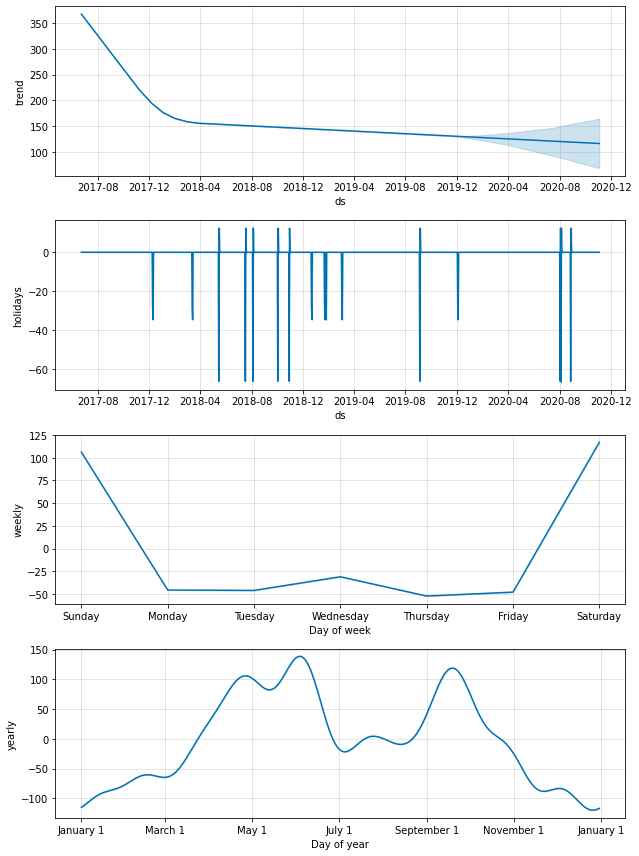

In [24]:
# print the results after adjusting prior scales
m.plot_components(forecast);
print(forecast.columns)